In [2]:
#pip install feather-format

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sagemaker
import boto3
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',None) # To display all columns
pd.set_option('display.max_rows',None) # To display all columns
client = boto3.client('s3')
import feather
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from functools import reduce

In [4]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [3]:
df = pd.read_feather('s3://haseebdata/Dataset/Data.ftr')

In [6]:
dfu = pd.read_feather('s3://haseebdata/Dataset/Users.ftr')
dfq = pd.read_feather('s3://haseebdata/Dataset/dfq.ftr')

In [73]:
dfq.head()

,question_id,correct_answer,bundle_id,explanation_id,part,tags,deployed_at
0,1,b,1,1,1,1;2;179;181,2019-05-17 11:40:17.098
1,2,a,2,2,1,15;2;182,2019-05-17 11:40:19.720
2,3,b,3,3,1,14;2;179;183,2019-05-17 11:40:22.784
3,4,b,4,4,1,9;2;179;184,2019-05-17 11:40:25.357
4,5,c,5,5,1,8;2;179;181,2019-05-17 11:40:28.439


## DATASET

In [74]:
dfq['question_id'].nunique()

13169

In [7]:
df.head()

,index,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD,correct_answer,bundle_id,explanation_id,deployed_at,correct
0,0,1565096190868,1,5012,b,38.0,1,c,3544,3544,2019-09-17 02:43:28.616,0.0
1,1,1565096221062,2,4706,c,24.0,1,c,3238,3238,2019-10-30 05:34:30.723,1.0
2,2,1565096293432,3,4366,b,68.0,1,b,2898,2898,2019-10-30 05:37:51.451,1.0
3,3,1565096339668,4,4829,a,42.0,1,c,3361,3361,2019-06-24 09:24:51.347,0.0
4,4,1565096401774,5,6528,b,59.0,1,d,5060,5060,2019-10-17 03:03:15.009,0.0


In [29]:
A = df.loc[df['question_id']== 5012]
A[0:5] 

,index,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD,correct_answer,bundle_id,explanation_id,deployed_at,correct
0,0,1565096190868,1,5012,b,38.0,1,c,3544,3544,2019-09-17 02:43:28.616,0.0
362,362,1567978902667,273,5012,b,33.0,1,c,3544,3544,2019-09-17 02:43:28.616,0.0
254994,33242848,1559681288864,14241,5012,c,60.0,238,c,3544,3544,2019-09-17 02:43:28.616,1.0
301027,38046073,1547163310634,9756,5012,d,4.0,263,c,3544,3544,2019-09-17 02:43:28.616,0.0
462191,47081213,1562505775439,2354,5012,c,40.0,351,c,3544,3544,2019-09-17 02:43:28.616,1.0


In [60]:
A['bundle_id'].nunique()

1

In [8]:
dfu= dfu.sort_values(['user_iD'], ascending=[True])
dfu.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
0,1,1082,753,329,69.593346,36.750
103211,2,1103,765,338,69.356301,24.000
205341,3,10,3,7,30.000000,38.000
305985,4,2699,1932,767,71.582067,27.666
408468,5,1233,754,479,61.151663,23.250


In [32]:
df_85 = dfu.loc[dfu['Percentage'] >= 85]
df_85.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
488880,58,7216,6568,648,91.019956,36.000
3150,103,7,6,1,85.714286,22.000
190937,285,74,73,1,98.648649,0.333
242583,338,928,792,136,85.344828,20.000
264909,360,675,574,101,85.037037,24.333


In [71]:
len(df_85)

9711

In [33]:
df_80 = dfu.loc[dfu['Percentage'] >= 80]
len(df_80)

27884

In [34]:
df_80.head()


,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
408469,50,8779,7310,1469,83.266887,24.000
488880,58,7216,6568,648,91.019956,36.000
722037,98,7032,5965,1067,84.826507,29.667
723092,99,48,39,9,81.250000,18.000
3150,103,7,6,1,85.714286,22.000


In [10]:
df_90 = dfu.loc[dfu['Percentage'] >= 90]
df_90.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
488880,58,7216,6568,648,91.019956,36.000
190937,285,74,73,1,98.648649,0.333
708625,853,38,35,3,92.105263,19.000
201669,2962,199,183,16,91.959799,24.000
260175,3554,438,405,33,92.465753,22.000


## PLOTS

<AxesSubplot:xlabel='user_iD'>

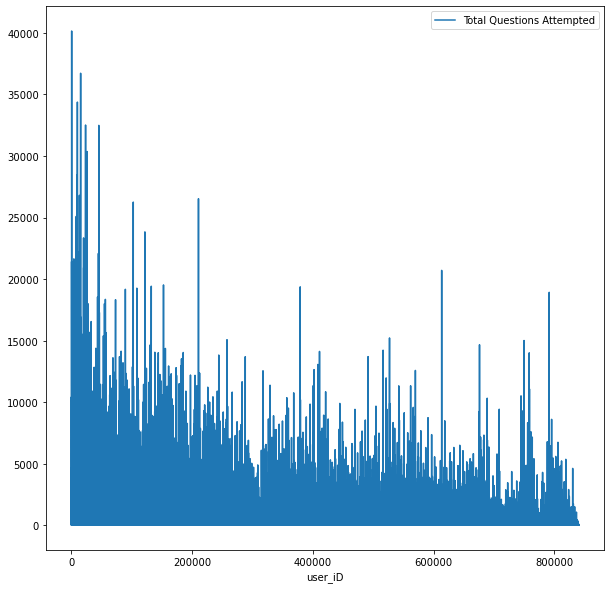

In [63]:
dfu.plot( x='user_iD', y='Total Questions Attempted' , figsize = (10,10))

<AxesSubplot:ylabel='Frequency'>

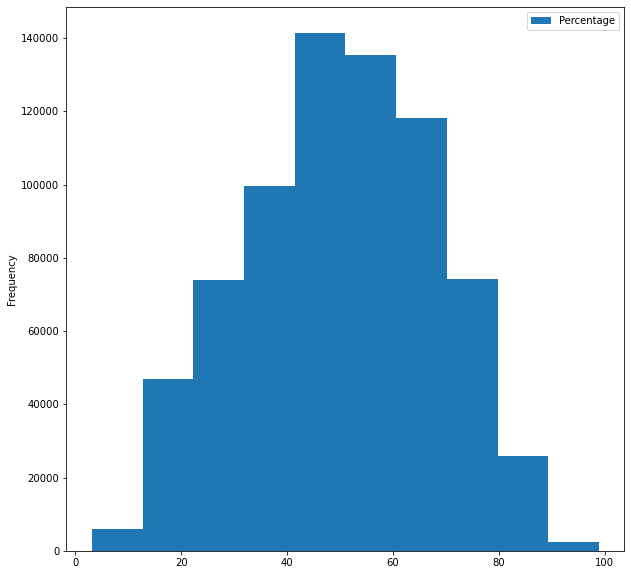

In [64]:
dfu.plot( x='Total Questions Attempted', y='Percentage' , kind ='hist', figsize = (10,10))

<AxesSubplot:ylabel='Frequency'>

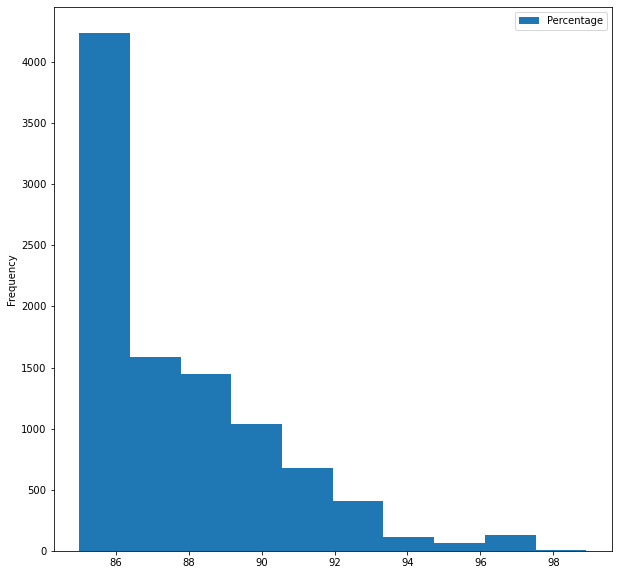

In [65]:
df_85.plot( x='Total Questions Attempted', y='Percentage' , kind ='hist', figsize = (10,10))

<AxesSubplot:ylabel='Frequency'>

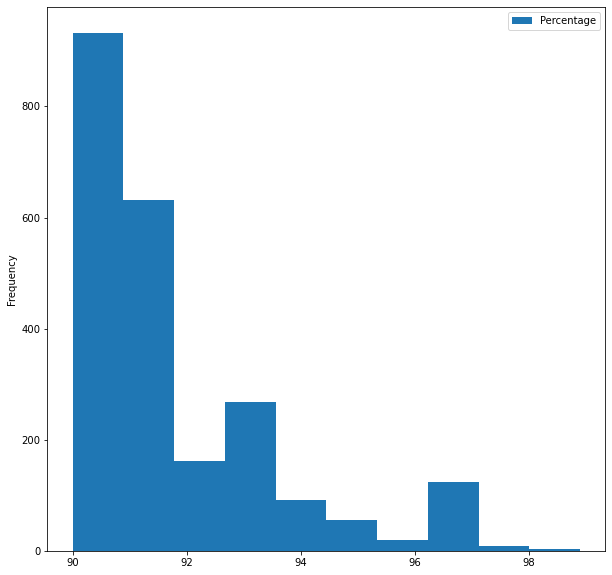

In [66]:
df_90.plot( x='Total Questions Attempted', y='Percentage' , kind ='hist', figsize = (10,10))

## DESCRIBE THE USERS DATASET QUESTIONS ATTEMPTION

In [14]:
dfu['Total Questions Attempted'].describe()

count    724139.000000
mean        131.371001
std         563.985478
min           2.000000
25%           7.000000
50%          14.000000
75%          41.000000
max       40157.000000
Name: Total Questions Attempted, dtype: float64

## TOP USER 

In [15]:
top_U = dfu.loc[dfu['Total Questions Attempted']== 40157]
top_U 

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
278286,373,40157,32139,8018,80.033369,22.25


## LOWEST USERS

In [16]:
low_U = dfu.loc[dfu['Total Questions Attempted']== 2]
low_U[0:5] 

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
715699,92,2,1,1,50.0,13.0
649148,7552,2,1,1,50.0,28.0
707724,8445,2,1,1,50.0,27.5
717627,9381,2,1,1,50.0,46.5
718413,9454,2,1,1,50.0,11.0


In [17]:
len(low_U)

9731

## REPEATED QUESTIONS COUNT BY EACH QUESTION

In [4]:
df_i = df.groupby(['user_iD', 'question_id']).size().reset_index(name='counts')
df_i.head()

,user_iD,question_id,counts
0,1,7,2
1,1,10,2
2,1,11,1
3,1,13,1
4,1,29,1


In [6]:
df_i.to_feather('RepeatedQuestion.ftr')

## REPEAT QUESTIONS ATLEAST 2

In [19]:
Repeat = df_i.loc[df_i['counts'] > 1]
Repeat.head()

,user_iD,question_id,counts
0,1,7,2
1,1,10,2
7,1,59,2
20,1,150,2
26,1,174,2


In [68]:
Repeat['user_iD'].nunique()

190880

## REPEAT QUESTIONS MORE THAN 2

In [20]:
Repeat_2 = df_i.loc[df_i['counts'] > 2]
Repeat_2[0:5]

,user_iD,question_id,counts
33,1,243,4
49,1,485,4
55,1,555,5
64,1,600,3
66,1,667,4


## CHECKING REPEATED QUESTIONS BEHAVIOUR

In [21]:
Q555 = df.loc[df['question_id'] == 555]
Q555[0:20]

,index,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD,correct_answer,bundle_id,explanation_id,deployed_at,correct
156,156,1566655050670,147,555,a,22.0,1,c,555,555,2019-06-24 08:47:07.802,0.0
327,327,1567517420484,258,555,b,28.0,1,c,555,555,2019-06-24 08:47:07.802,0.0
681,681,1569287374890,430,555,c,22.0,1,c,555,555,2019-06-24 08:47:07.802,1.0
712,712,1569366821751,451,555,c,31.0,1,c,555,555,2019-06-24 08:47:07.802,1.0
1008,1008,1569568197126,628,555,c,20.0,1,c,555,555,2019-06-24 08:47:07.802,1.0
9376,2989921,1568760029928,881,555,c,16.0,11,c,555,555,2019-06-24 08:47:07.802,1.0
13931,16711066,1562404336767,162,555,c,20.0,16,c,555,555,2019-06-24 08:47:07.802,1.0
37573,65104509,1563762085450,1260,555,c,17.0,53,c,555,555,2019-06-24 08:47:07.802,1.0
45338,69955957,1563456938753,1608,555,c,24.0,58,c,555,555,2019-06-24 08:47:07.802,1.0
55092,76565136,1559798193083,4052,555,c,17.0,67,c,555,555,2019-06-24 08:47:07.802,1.0


In [34]:
Q667 = df.loc[df['question_id'] == 667]
Q667[0:20]

,index,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD,correct_answer,bundle_id,explanation_id,deployed_at,correct
163,163,1566655865760,154,667,b,40.0,1,c,667,667,2019-03-22 09:57:03.142,0.0
331,331,1567517687926,262,667,c,18.0,1,c,667,667,2019-03-22 09:57:03.142,1.0
680,680,1569287283435,429,667,a,25.0,1,c,667,667,2019-03-22 09:57:03.142,0.0
1060,1060,1569645870048,662,667,c,18.0,1,c,667,667,2019-03-22 09:57:03.142,1.0
6572,79082154,1557823098944,407,667,b,23.0,7,c,667,667,2019-03-22 09:57:03.142,0.0
7363,79082945,1567152086149,1047,667,a,16.0,7,c,667,667,2019-03-22 09:57:03.142,0.0
10008,2990553,1571026345722,1511,667,c,16.0,11,c,667,667,2019-03-22 09:57:03.142,1.0
49905,76559949,1548239312147,611,667,c,16.0,67,c,667,667,2019-03-22 09:57:03.142,1.0
63813,88842286,1554365094509,276,667,b,19.0,82,c,667,667,2019-03-22 09:57:03.142,0.0
63815,88842288,1554365188861,278,667,c,17.0,82,c,667,667,2019-03-22 09:57:03.142,1.0


In [36]:
Q243 = df.loc[df['question_id'] == 243]
Q243[0:25]

,index,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD,correct_answer,bundle_id,explanation_id,deployed_at,correct
170,170,1566739827528,161,243,a,24.0,1,c,243,243,2017-12-29 16:09:30.617,0.0
333,333,1567518023374,264,243,c,18.0,1,c,243,243,2017-12-29 16:09:30.617,1.0
675,675,1569284991519,424,243,c,21.0,1,c,243,243,2017-12-29 16:09:30.617,1.0
713,713,1569366922604,452,243,c,21.0,1,c,243,243,2017-12-29 16:09:30.617,1.0
6587,79082169,1557823960329,422,243,a,22.0,7,c,243,243,2017-12-29 16:09:30.617,0.0
6590,79082172,1557824084450,425,243,c,18.0,7,c,243,243,2017-12-29 16:09:30.617,1.0
6597,79082179,1557824505343,432,243,c,17.0,7,c,243,243,2017-12-29 16:09:30.617,1.0
6942,79082524,1558002149940,694,243,c,17.0,7,c,243,243,2017-12-29 16:09:30.617,1.0
7558,92072279,1568975353805,105,243,c,72.0,9,c,243,243,2017-12-29 16:09:30.617,1.0
9634,2990179,1569710553386,1137,243,c,20.0,11,c,243,243,2017-12-29 16:09:30.617,1.0


## Sorting Dataset w.r.t TIMESTAMP & USERID

In [22]:
df_2 = df.sort_values(['user_iD', 'timestamp'], ascending=[True, True])

In [7]:
df_2.head()

NameError: name 'df_2' is not defined

In [23]:
#df_2.to_feather('FinalData.ftr')

## MIN MAX TIMESTAMP OF EACH USER

In [24]:
df2 = df_2.groupby(['user_iD']).agg(Minimum_Date=('timestamp', np.min), Maximum_Date=('timestamp', np.max)).reset_index()

In [25]:
df2.head()

,user_iD,Minimum_Date,Maximum_Date
0,1,1565096190868,1569647443041
1,2,1506015043018,1567305695137
2,3,1566620784438,1567142294316
3,4,1566782278107,1572041297204
4,5,1546437487910,1567604533505


In [26]:
df2 = df2.rename({'Minimum_Date': 'Min_Time', 'Maximum_Date': 'Max_Time'}, axis=1)
df2.head()

,user_iD,Min_Time,Max_Time
0,1,1565096190868,1569647443041
1,2,1506015043018,1567305695137
2,3,1566620784438,1567142294316
3,4,1566782278107,1572041297204
4,5,1546437487910,1567604533505


## CONVERTING TIMESTAMP TO REAL DATE & TIME

In [27]:
df2['Min_date']= pd.to_datetime(df2['Min_Time'], unit='ms')
df2['Max_date']= pd.to_datetime(df2['Max_Time'], unit='ms')
df2.head()

,user_iD,Min_Time,Max_Time,Min_date,Max_date
0,1,1565096190868,1569647443041,2019-08-06 12:56:30.868,2019-09-28 05:10:43.041
1,2,1506015043018,1567305695137,2017-09-21 17:30:43.018,2019-09-01 02:41:35.137
2,3,1566620784438,1567142294316,2019-08-24 04:26:24.438,2019-08-30 05:18:14.316
3,4,1566782278107,1572041297204,2019-08-26 01:17:58.107,2019-10-25 22:08:17.204
4,5,1546437487910,1567604533505,2019-01-02 13:58:07.910,2019-09-04 13:42:13.505


## EXTRACTING YEAR INFO

In [46]:
df2['Join_Year'] = df2['Min_date'].dt.year 

In [48]:
df2['End_Year'] = df2['Max_date'].dt.year 

In [58]:
df2[0:50]

,user_iD,Min_Time,Max_Time,Min_date,Max_date,diff_hours,diff_days,Join_Year,End_Year
0,1,1565096190868,1569647443041,2019-08-06 12:56:30.868,2019-09-28 05:10:43.041,1.264237e+03,5.267653e+01,2019,2019
1,2,1506015043018,1567305695137,2017-09-21 17:30:43.018,2019-09-01 02:41:35.137,1.702518e+04,7.093825e+02,2017,2019
2,3,1566620784438,1567142294316,2019-08-24 04:26:24.438,2019-08-30 05:18:14.316,1.448639e+02,6.035994e+00,2019,2019
3,4,1566782278107,1572041297204,2019-08-26 01:17:58.107,2019-10-25 22:08:17.204,1.460839e+03,6.086828e+01,2019,2019
4,5,1546437487910,1567604533505,2019-01-02 13:58:07.910,2019-09-04 13:42:13.505,5.879735e+03,2.449890e+02,2019,2019
5,6,1566881772981,1566881903552,2019-08-27 04:56:12.981,2019-08-27 04:58:23.552,3.626972e-02,1.511238e-03,2019,2019
6,7,1552991581751,1568626164826,2019-03-19 10:33:01.751,2019-09-16 09:29:24.826,4.342940e+03,1.809558e+02,2019,2019
7,8,1567144893349,1567145808828,2019-08-30 06:01:33.349,2019-08-30 06:16:48.828,2.542997e-01,1.059582e-02,2019,2019
8,9,1563571808629,1568975764395,2019-07-19 21:30:08.629,2019-09-20 10:36:04.395,1.501099e+03,6.254578e+01,2019,2019
9,10,1565176019438,1567147210311,2019-08-07 11:06:59.438,2019-08-30 06:40:10.311,5.475530e+02,2.281471e+01,2019,2019


## HISTOGRAM OF USERS JOINING

<AxesSubplot:ylabel='Frequency'>

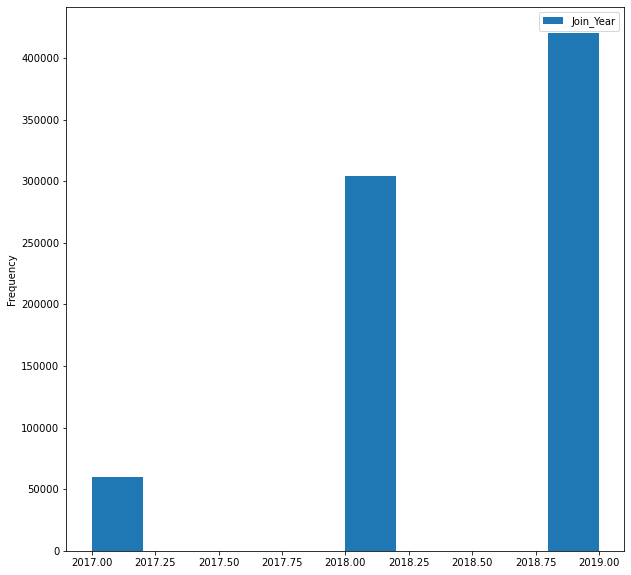

In [55]:
df2.plot( x='user_iD', y='Join_Year' , kind='hist' , figsize = (10,10))

## HISTOGRAM OF USERS LEAVING

<AxesSubplot:ylabel='Frequency'>

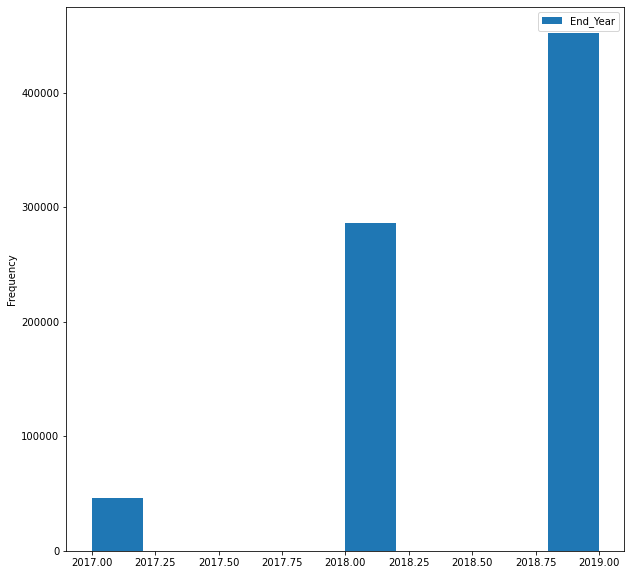

In [57]:
df2.plot( x='user_iD', y='End_Year' , kind='hist' , figsize = (10,10))

## CALCULATING DIFFERENCE BETWEEN MIN & MAX in terms of HOURS

In [28]:
df2['diff'] = df2['Max_date'] - df2['Min_date']
df2['diff'] = df2['diff'] / np.timedelta64(1, 'h')
#df2['diff']= pd.to_datetime(df2['diff'], unit='ms')

df2.head()

,user_iD,Min_Time,Max_Time,Min_date,Max_date,diff
0,1,1565096190868,1569647443041,2019-08-06 12:56:30.868,2019-09-28 05:10:43.041,1264.236715
1,2,1506015043018,1567305695137,2017-09-21 17:30:43.018,2019-09-01 02:41:35.137,17025.181144
2,3,1566620784438,1567142294316,2019-08-24 04:26:24.438,2019-08-30 05:18:14.316,144.863855
3,4,1566782278107,1572041297204,2019-08-26 01:17:58.107,2019-10-25 22:08:17.204,1460.838638
4,5,1546437487910,1567604533505,2019-01-02 13:58:07.910,2019-09-04 13:42:13.505,5879.734887


## CALCULATING DIFFERENCE BETWEEN MIN & MAX in terms of DAYS

In [29]:
df2 = df2.rename({'diff': 'diff_hours'}, axis=1)
df2['diff_days'] = df2['diff_hours'].div(24)

In [43]:
df2.head()

,user_iD,Min_Time,Max_Time,Min_date,Max_date,diff_hours,diff_days
0,1,1565096190868,1569647443041,2019-08-06 12:56:30.868,2019-09-28 05:10:43.041,1264.236715,52.676530
1,2,1506015043018,1567305695137,2017-09-21 17:30:43.018,2019-09-01 02:41:35.137,17025.181144,709.382548
2,3,1566620784438,1567142294316,2019-08-24 04:26:24.438,2019-08-30 05:18:14.316,144.863855,6.035994
3,4,1566782278107,1572041297204,2019-08-26 01:17:58.107,2019-10-25 22:08:17.204,1460.838638,60.868277
4,5,1546437487910,1567604533505,2019-01-02 13:58:07.910,2019-09-04 13:42:13.505,5879.734887,244.988954


In [30]:
df2['diff_days'].describe()

count    784309.000000
mean         25.826590
std          82.422915
min           0.000000
25%           0.001635
50%           0.006499
75%           2.983404
max         946.089731
Name: diff_days, dtype: float64

In [61]:
df2.to_feather('Time.ftr')

## USERS WHO's TIMESTAMP ISNT CORRECT

In [31]:
W = df2.loc[df2['diff_days'] == 0]
W[0:20]

,user_iD,Min_Time,Max_Time,Min_date,Max_date,diff_hours,diff_days
673,682,1561593711737,1561593711737,2019-06-27 00:01:51.737,2019-06-27 00:01:51.737,0.0,0.0
1828,1841,1544196032730,1544196032730,2018-12-07 15:20:32.730,2018-12-07 15:20:32.730,0.0,0.0
7206,7237,1567311853461,1567311853461,2019-09-01 04:24:13.461,2019-09-01 04:24:13.461,0.0,0.0
7751,7793,1567338703246,1567338703246,2019-09-01 11:51:43.246,2019-09-01 11:51:43.246,0.0,0.0
7867,7912,1567339923978,1567339923978,2019-09-01 12:12:03.978,2019-09-01 12:12:03.978,0.0,0.0
7938,7985,1567340548340,1567340548340,2019-09-01 12:22:28.340,2019-09-01 12:22:28.340,0.0,0.0
7995,8043,1567341019417,1567341019417,2019-09-01 12:30:19.417,2019-09-01 12:30:19.417,0.0,0.0
8010,8058,1567341133132,1567341133132,2019-09-01 12:32:13.132,2019-09-01 12:32:13.132,0.0,0.0
8057,8107,1567341593208,1567341593208,2019-09-01 12:39:53.208,2019-09-01 12:39:53.208,0.0,0.0
8118,8173,1567342202917,1567342202917,2019-09-01 12:50:02.917,2019-09-01 12:50:02.917,0.0,0.0


## TOTAL USERS : Wrong Timestamp

In [32]:
len(W)

27372

In [28]:
C = df.loc[df['user_iD'] == 9764]
C[0:50]

,index,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD,correct_answer,bundle_id,explanation_id,deployed_at,correct
11613690,94538976,1567374239101,1,5399,a,9.0,9764,d,3931,3931,2019-10-17 02:17:48.993,0.0


# STARTING WORK ON DECEMBER 29th

## GOING WITH A DATASET :  Percentage => 80


In [36]:
df_80 = dfu.loc[dfu['Percentage'] >= 80]

In [37]:
df_80[0:10]

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
408469,50,8779,7310,1469,83.266887,24.000
488880,58,7216,6568,648,91.019956,36.000
722037,98,7032,5965,1067,84.826507,29.667
723092,99,48,39,9,81.250000,18.000
3150,103,7,6,1,85.714286,22.000
19685,119,7296,5949,1347,81.537829,20.333
33119,132,6,5,1,83.333333,14.500
89603,187,10360,8494,1866,81.988417,28.000
106327,203,2936,2374,562,80.858311,24.333
114656,211,6,5,1,83.333333,18.500


In [ ]:
df , df_80

In [42]:
df3 = pd.merge(
    df,
    df_80,
    how="inner",
    on='user_iD',
    #left_on=user_iD,
    #right_on=None,
    #left_index=False,
    #right_index=False,
    #sort=True,
    suffixes=("_x", "_y"),
    #copy=True,
    indicator=False,
    validate=None,
)

In [45]:
df3.head()

,index,timestamp,solving_id,question_id,user_answer,elapsed_time_x,user_iD,correct_answer,bundle_id,explanation_id,deployed_at,correct,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time_y
0,62346659,1540815498477,1,3654,d,47.0,50,d,2186,2186,2019-09-17 02:49:05.091,1.0,8779,7310,1469,83.266887,24.0
1,62346660,1540815563576,2,898,c,17.0,50,c,898,898,2017-12-29 15:34:47.831,1.0,8779,7310,1469,83.266887,24.0
2,62346661,1540815619061,3,3633,c,53.0,50,b,2165,2165,2019-05-17 12:10:59.583,0.0,8779,7310,1469,83.266887,24.0
3,62346662,1540815663799,4,5805,a,41.0,50,d,4337,4337,2018-02-20 05:45:24.616,0.0,8779,7310,1469,83.266887,24.0
4,62346663,1540815691595,5,5680,d,25.0,50,c,4212,4212,2019-09-16 12:05:05.072,0.0,8779,7310,1469,83.266887,24.0


In [46]:
df3['user_iD'].nunique()

27884

In [47]:
df_80['user_iD'].nunique()

27884

In [48]:
df['user_iD'].nunique()

784309

In [49]:
del df3['index']
del df3['Total Questions Attempted']
del df3['Corrected']
del df3['Incorrected']
del df3['Percentage']
del df3['elapsed_time_y']

df3.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time_x,user_iD,correct_answer,bundle_id,explanation_id,deployed_at,correct
0,1540815498477,1,3654,d,47.0,50,d,2186,2186,2019-09-17 02:49:05.091,1.0
1,1540815563576,2,898,c,17.0,50,c,898,898,2017-12-29 15:34:47.831,1.0
2,1540815619061,3,3633,c,53.0,50,b,2165,2165,2019-05-17 12:10:59.583,0.0
3,1540815663799,4,5805,a,41.0,50,d,4337,4337,2018-02-20 05:45:24.616,0.0
4,1540815691595,5,5680,d,25.0,50,c,4212,4212,2019-09-16 12:05:05.072,0.0


In [50]:
df3.rename(columns={'elapsed_time_x': 'elapsed_time'}, inplace=True)
df3.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD,correct_answer,bundle_id,explanation_id,deployed_at,correct
0,1540815498477,1,3654,d,47.0,50,d,2186,2186,2019-09-17 02:49:05.091,1.0
1,1540815563576,2,898,c,17.0,50,c,898,898,2017-12-29 15:34:47.831,1.0
2,1540815619061,3,3633,c,53.0,50,b,2165,2165,2019-05-17 12:10:59.583,0.0
3,1540815663799,4,5805,a,41.0,50,d,4337,4337,2018-02-20 05:45:24.616,0.0
4,1540815691595,5,5680,d,25.0,50,c,4212,4212,2019-09-16 12:05:05.072,0.0


In [52]:
df3 = df3.reindex(['user_iD','question_id','user_answer','correct_answer' , 'correct' , 'elapsed_time' , 'solving_id' , 'explanation_id' , 'bundle_id' , 'timestamp' , 'deployed_at'], axis=1)

In [53]:
df3.head()

,user_iD,question_id,user_answer,correct_answer,correct,elapsed_time,solving_id,explanation_id,bundle_id,timestamp,deployed_at
0,50,3654,d,d,1.0,47.0,1,2186,2186,1540815498477,2019-09-17 02:49:05.091
1,50,898,c,c,1.0,17.0,2,898,898,1540815563576,2017-12-29 15:34:47.831
2,50,3633,c,b,0.0,53.0,3,2165,2165,1540815619061,2019-05-17 12:10:59.583
3,50,5805,a,d,0.0,41.0,4,4337,4337,1540815663799,2018-02-20 05:45:24.616
4,50,5680,d,c,0.0,25.0,5,4212,4212,1540815691595,2019-09-16 12:05:05.072


In [54]:
df3.to_feather('Dataframe80.ftr')

In [ ]:
df3['user_iD'].nunique